#Import Libraries and reading data

In [ ]:
!pip install -q keras-tuner

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score

import tensorflow as tf
#from keras_tuner.tuners import RandomSearch

import joblib
import os

sns.set_style("darkgrid")
sns.set_palette("Set2")

In [3]:
path = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
df = pd.read_csv(path)
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
592,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S


In [ ]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


  # Data Wrangling

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum() /df.shape[0] *100

,0
passengerid,0.000000
survived,0.000000
pclass,0.000000
name,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:

df["family_size"] = df["sibsp"] + df["parch"] + 1

In [6]:
df["age"].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

#EDA

In [ ]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare,family_size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


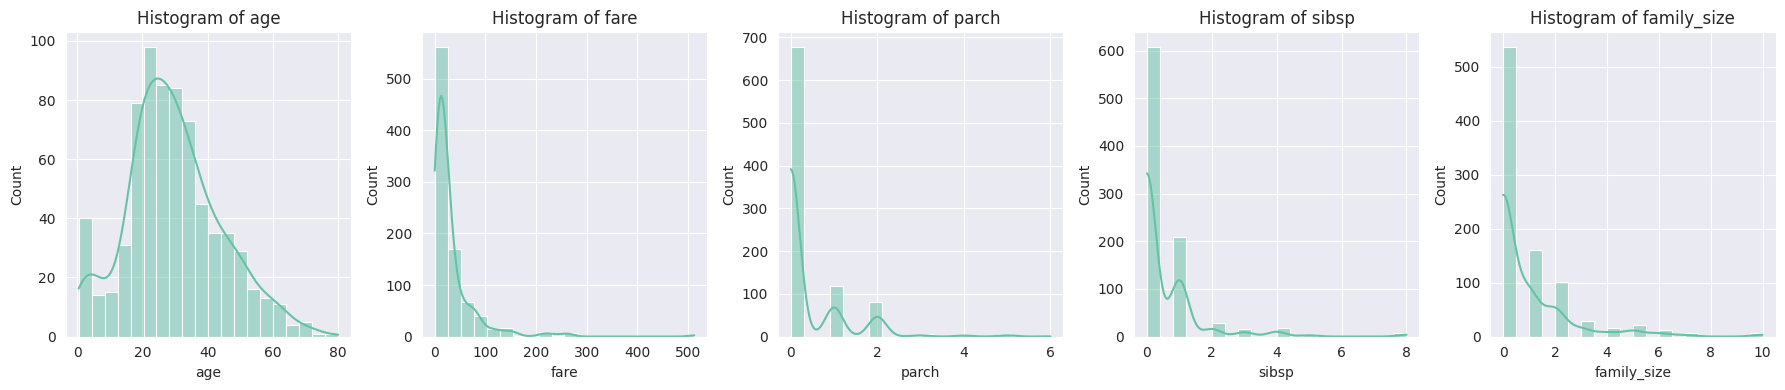

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(18, 4))

num_cols = ['age','fare','parch','sibsp','family_size']
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

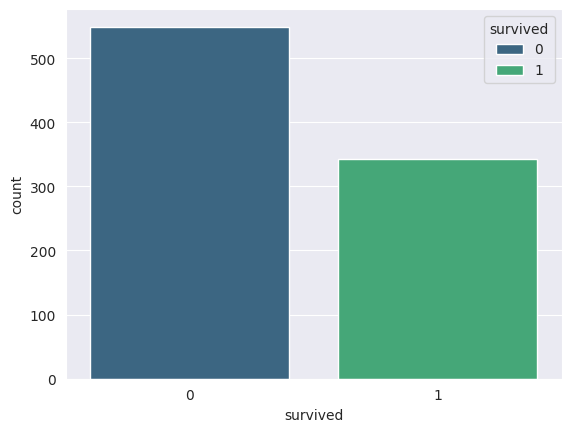

In [ ]:
sns.countplot(data=df, x='survived',palette="viridis",hue="survived")
plt.show()

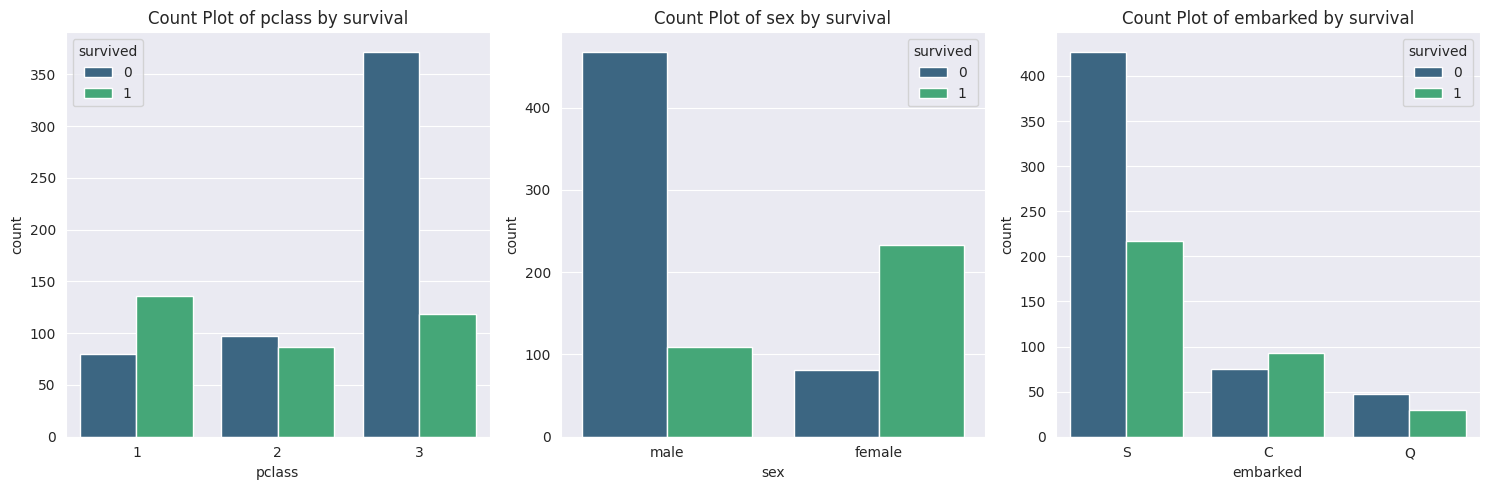

In [ ]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

cat_cols = ['pclass','sex','embarked']
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i],palette="viridis",hue='survived')
    axes[i].set_title(f"Count Plot of {col} by survival")


plt.tight_layout()
plt.show()

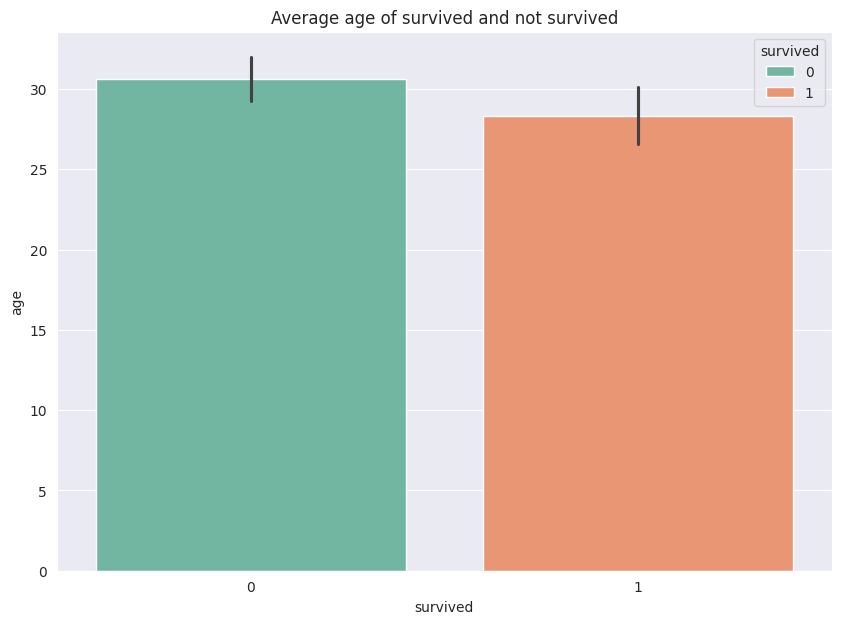

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data = df,x = "survived",y = "age",hue = "survived")
plt.title("Average age of survived and not survived")
plt.show()

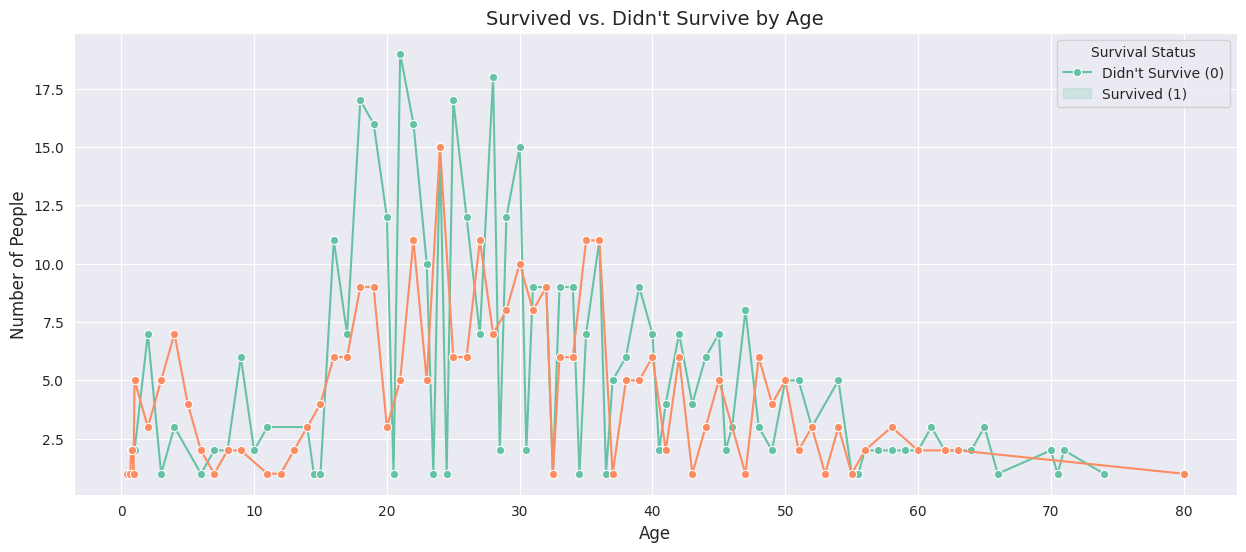

In [ ]:
age_survive = df.groupby(["age", "survived"]).size().reset_index(name="Count")

plt.figure(figsize=(15, 6))
sns.lineplot(data=age_survive, x="age", y="Count", hue="survived", marker="o")

# Titles and labels
plt.title("Survived vs. Didn't Survive by Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.grid(True)
plt.legend(title="Survival Status", labels=["Didn't Survive (0)", "Survived (1)"])

# Show plot
plt.show()

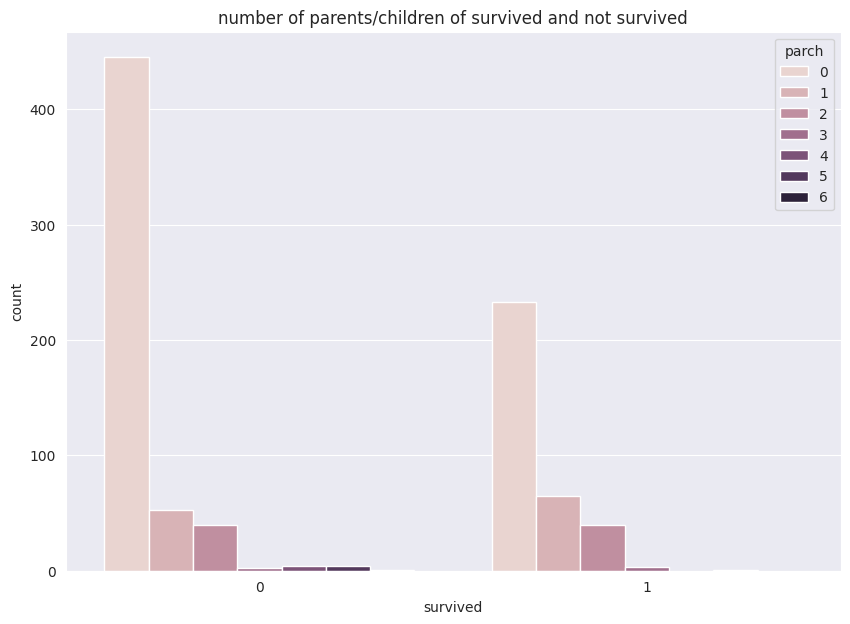

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x="survived",hue="parch")
plt.title("number of parents/children of survived and not survived")
plt.show()

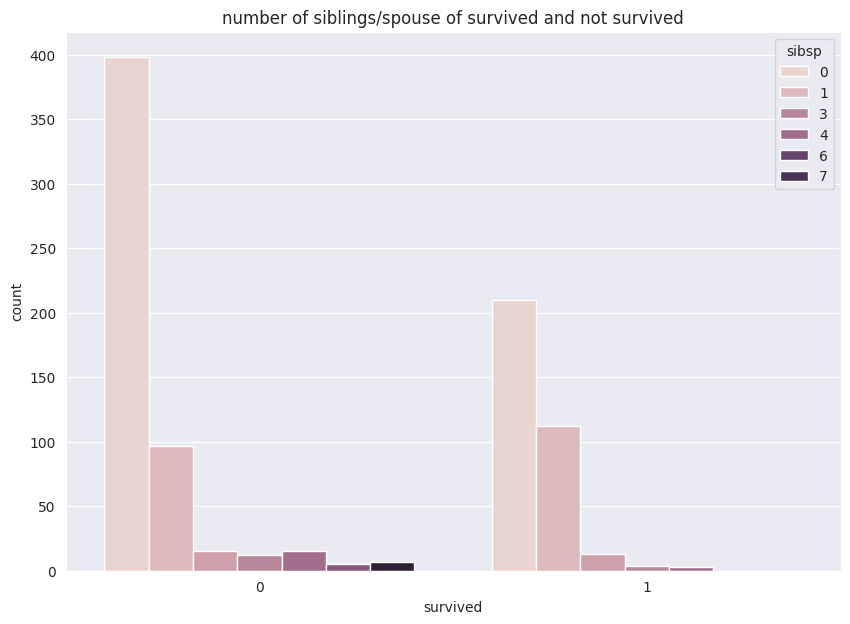

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x="survived",hue="sibsp")
plt.title("number of siblings/spouse of survived and not survived")
plt.show()

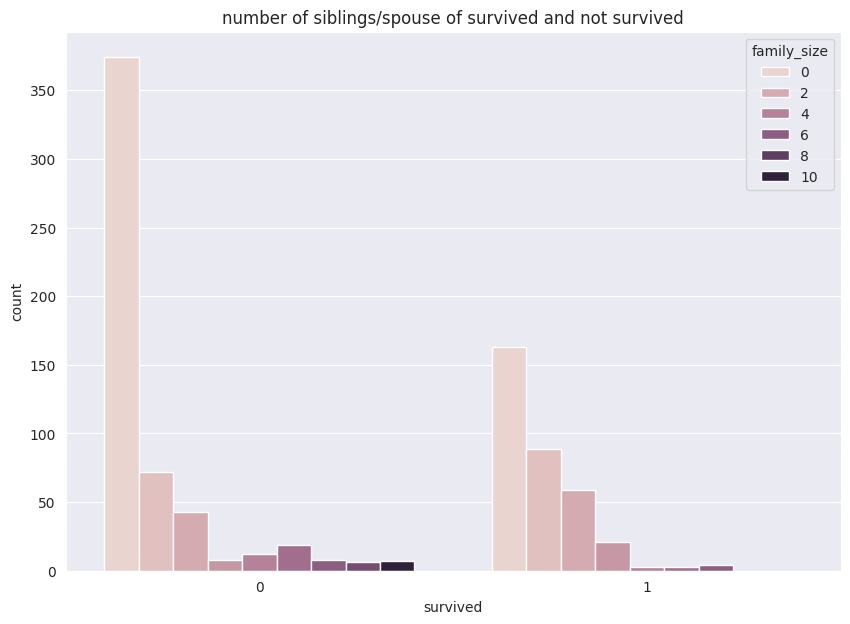

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x="survived",hue="family_size")
plt.title("number of siblings/spouse of survived and not survived")
plt.show()

#Splitting the data

In [ ]:
X = df.drop(columns=['survived','passengerid','cabin','name','ticket'])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          714 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embarked     889 non-null    object 
 7   family_size  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
#slice cols
num_cols  = ['age','fare']
cat_cols = ['embarked','sex']
ready_cols =  list(set(X.columns) - set(num_cols) - set(cat_cols))
ready_cols

['sibsp', 'parch', 'family_size', 'pclass']

In [ ]:
#pipline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore"))
])
ready_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessor = ColumnTransformer([
    ('num',num_pipeline,num_cols),
    ('cat',cat_pipeline,cat_cols),
    ('ready',ready_pipeline,ready_cols)
])

X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

In [ ]:
# Check shapes again
print("X_train_final shape", X_train_final.shape)
print("y_train shape", y_train.shape)
print()
print("X_test_final shape", X_test_final.shape)
print("y_test shape", y_test.shape)

X_train_final shape (712, 9)
y_train shape (712,)

X_test_final shape (179, 9)
y_test shape (179,)


In [ ]:
#dump the preprocessor
MODELS_FODLER_PATH = os.path.join(os.getcwd(), "models")
os.makedirs(MODELS_FODLER_PATH, exist_ok=True)
joblib.dump(preprocessor, os.path.join(MODELS_FODLER_PATH, "preprocessor.joblib"))

['/content/models/preprocessor.joblib']

#**Creating model**

In [ ]:
X_test_final.shape[1]

9

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_test_final.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4,seed=7),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4,seed=7),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4,seed=7),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4,seed=7),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,713 (702.00 KB)

 Trainable params: 179,713 (702.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True,patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=5,factor=0.1)
             ]
history = model.fit(X_train_final, y_train, epochs=100, batch_size=16, validation_split=0.2,verbose=1)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.5996 - loss: 0.6690 - val_accuracy: 0.5804 - val_loss: 0.6307
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6411 - loss: 0.6005 - val_accuracy: 0.6014 - val_loss: 0.6053
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6473 - loss: 0.6050 - val_accuracy: 0.7133 - val_loss: 0.5913
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6612 - loss: 0.5933 - val_accuracy: 0.7133 - val_loss: 0.5885
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6373 - loss: 0.5887 - val_accuracy: 0.7413 - val_loss: 0.5808
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6792 - loss: 0.5691 - val_accuracy: 0.7622 - val_loss: 0.5740
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7089 - loss: 0.5585 - val_accuracy: 0.7762 - val_loss: 0.5709
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7061 - loss: 0.5659 - val_accuracy: 0.

In [ ]:
model.evaluate(X_test_final,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8133 - loss: 0.5192 


[0.48565900325775146, 0.826815664768219]

In [ ]:
history = pd.DataFrame(history.history)
history["epochs"] = history.index + 1
history

,accuracy,loss,val_accuracy,val_loss,epochs
0,0.623902,0.645769,0.580420,0.630659,1
1,0.625659,0.607847,0.601399,0.605301,2
2,0.639719,0.602122,0.713287,0.591267,3
3,0.673111,0.570712,0.713287,0.588523,4
4,0.657293,0.581131,0.741259,0.580800,5
...,...,...,...,...,...
95,0.854130,0.368994,0.797203,0.484383,96
96,0.852373,0.378884,0.790210,0.486354,97
97,0.845343,0.371257,0.790210,0.480662,98
98,0.841828,0.367300,0.776224,0.488074,99


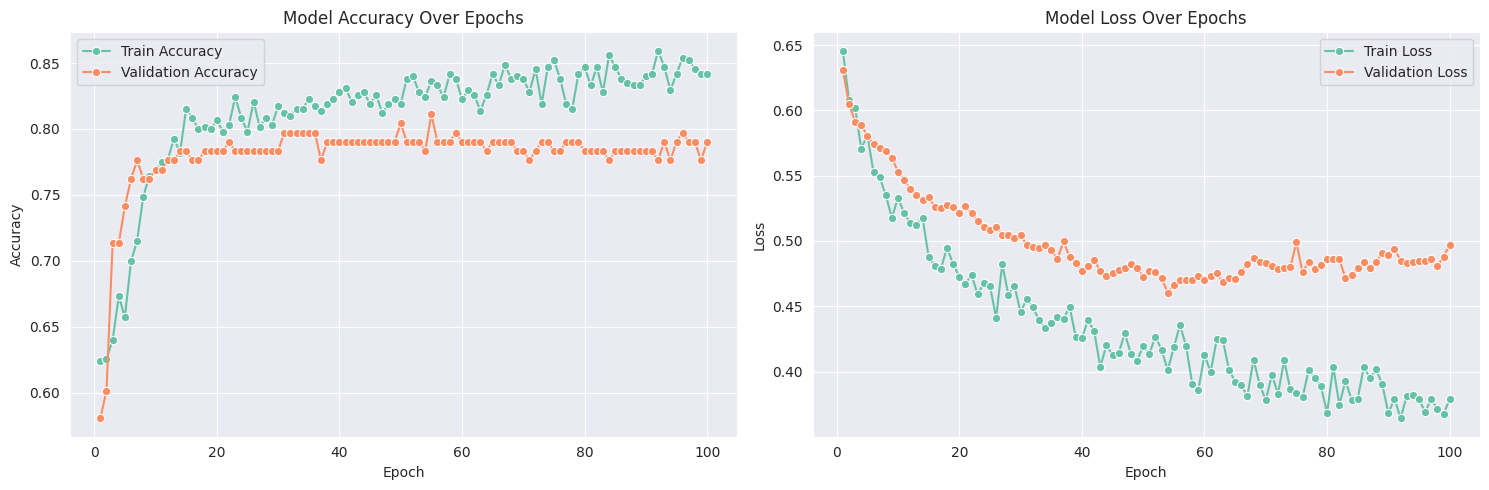

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,5))

# Accuracy plot
sns.lineplot(data=history, x="epochs", y="accuracy", label="Train Accuracy", marker="o", ax=axes[0])
sns.lineplot(data=history, x="epochs", y="val_accuracy", label="Validation Accuracy", marker="o", ax=axes[0])
axes[0].set_title("Model Accuracy Over Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Loss plot
sns.lineplot(data=history, x="epochs", y="loss", label="Train Loss", marker="o", ax=axes[1])
sns.lineplot(data=history, x="epochs", y="val_loss", label="Validation Loss", marker="o", ax=axes[1])
axes[1].set_title("Model Loss Over Epochs")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
#classification report
y_pred = model.predict(X_test_final)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



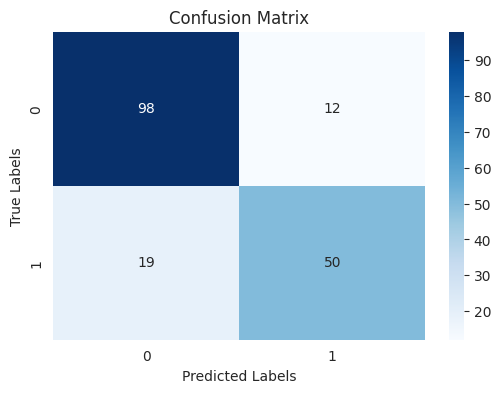

In [ ]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#*Using Keras Tuner*

In [ ]:
def build_model(hp):
  model = tf.keras.models.Sequential([
      # input layer
      tf.keras.layers.Input(shape = (X_test_final.shape[1],)),
      #Dense and Dropout layers 1
      tf.keras.layers.Dense(units = hp.Int("units1",min_value=512,max_value=1024,step=128), activation='relu'),
      tf.keras.layers.Dropout(hp.Float("drop1",min_value=0.3,max_value=0.5,step=0.1),seed=7),

      #Dense and Dropout layers 2
      tf.keras.layers.Dense(units = hp.Int("units2",min_value=256,max_value=512,step=128), activation='relu'),
      tf.keras.layers.Dropout(hp.Float("drop2",min_value=0.3,max_value=0.5,step=0.1),seed=7),

      #Dense and Dropout layers 3
      tf.keras.layers.Dense(units = hp.Int("units3",min_value=128,max_value=256,step=64), activation='relu'),
      tf.keras.layers.Dropout(hp.Float("drop3",min_value=0.3,max_value=0.5,step=0.1),seed=7),

      #Dense and Dropout layers 4
      tf.keras.layers.Dense(units = hp.Int("units3",min_value=32,max_value=128,step=32), activation='relu'),
      tf.keras.layers.Dropout(hp.Float("drop3",min_value=0.3,max_value=0.5,step=0.1),seed=7),

      #Dense and Dropout layers 5
      tf.keras.layers.Dense(units = hp.Int("units3",min_value=16,max_value=64,step=32), activation='relu'),
      tf.keras.layers.Dropout(hp.Float("drop3",min_value=0.3,max_value=0.5,step=0.1),seed=7),


      #output layer
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      optimizer="adamax",
      loss="binary_crossentropy",
      metrics = ["accuracy","f1_score"]

  )
  return model

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True,patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=5,factor=0.1)
             ]

tuner = RandomSearch(hypermodel=build_model,
                     objective= "val_accuracy",
                     max_trials = 15,
                     directory="model_tuning",
                     project_name = "titanic_tuning",
                     seed = 27)

Reloading Tuner from model_tuning/titanic_tuning/tuner0.json


In [ ]:
tuner.search(X_train_final, y_train, epochs=50, batch_size=16, validation_split=0.2,callbacks=callbacks)

In [ ]:
# Getting the best model configuration
best_model = tuner.get_best_models(num_models=1)[0]
best_model

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamax', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

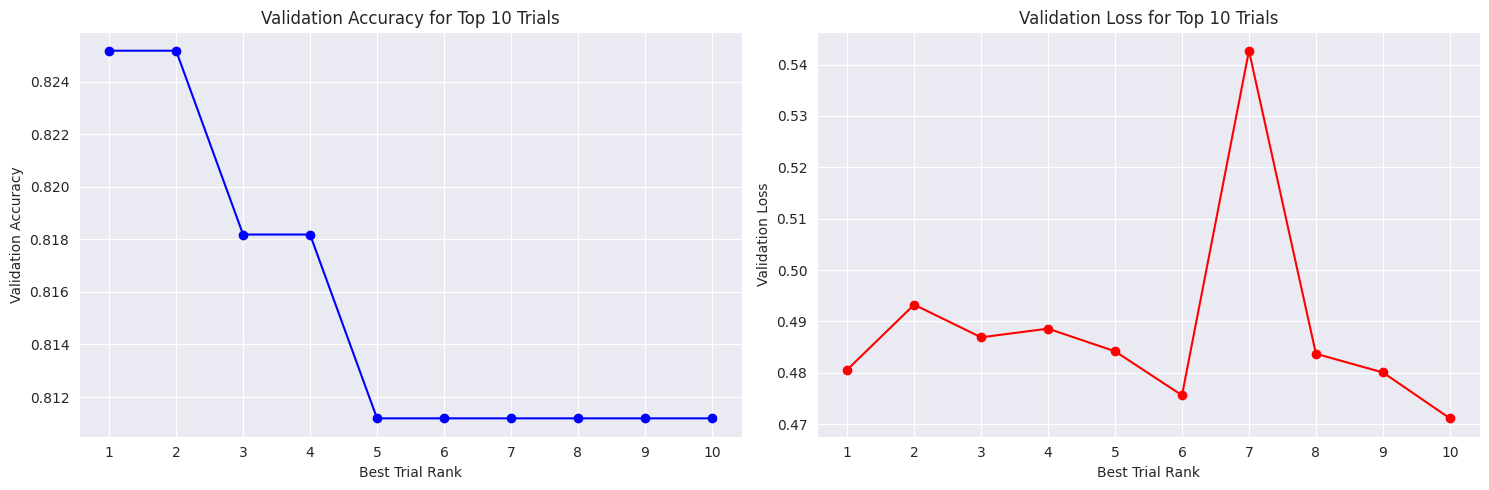

In [ ]:
num_trials = 10
best_trials = tuner.oracle.get_best_trials(num_trials=num_trials)

# Extract metrics for each trial
val_accuracies = []
val_losses = []
trial_nums = []

for i, trial in enumerate(best_trials):
    # Use the best epoch's metrics for each trial
    val_accuracies.append(trial.metrics.get_best_value('val_accuracy'))
    val_losses.append(trial.metrics.get_best_value('val_loss'))
    trial_nums.append(i+1)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot validation accuracy with 1-by-1 x-axis
ax1.plot(trial_nums, val_accuracies, 'bo-')
ax1.set_xlabel('Best Trial Rank')
ax1.set_ylabel('Validation Accuracy')
ax1.set_title(f'Validation Accuracy for Top {num_trials} Trials')
# Set x-ticks to go 1 by 1
ax1.set_xticks(range(1, num_trials+1))

# Plot validation loss with 1-by-1 x-axis
ax2.plot(trial_nums, val_losses, 'ro-')
ax2.set_xlabel('Best Trial Rank')
ax2.set_ylabel('Validation Loss')
ax2.set_title(f'Validation Loss for Top {num_trials} Trials')
# Set x-ticks to go 1 by 1
ax2.set_xticks(range(1, num_trials+1))

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate on test
test_loss, test_acc,test_f1score = best_model.evaluate(X_test_final, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f} %")
print(f"Test F1 Score: {test_f1score:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8184 - f1_score: 0.5844 - loss: 0.5214 
Test Loss: 0.4741
Test Accuracy: 0.8212 %
Test F1 Score: 0.5565


In [ ]:
#classification report
y_pred = best_model.predict(X_test_final)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



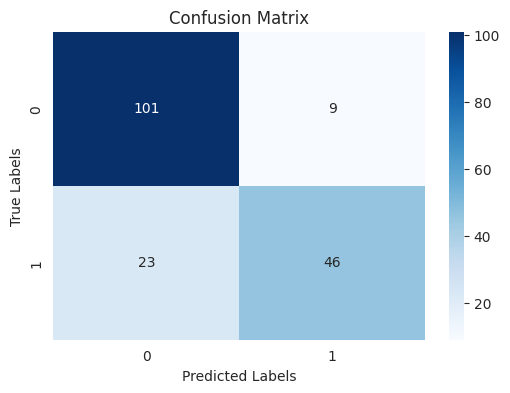

In [ ]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Saving the best model from hyperparameter tuning to a file
best_model.save(os.path.join(MODELS_FODLER_PATH, "best_titanic_model.keras"))

In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(os.path.join(MODELS_FODLER_PATH, "best_titanic_model.keras"))

# Evaluate on test
test_loss, test_acc,test_f1score = best_model.evaluate(X_test_final, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f} %")
print(f"Test F1 Score: {test_f1score:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8184 - f1_score: 0.5844 - loss: 0.5214 
Test Loss: 0.4741
Test Accuracy: 0.8212 %
Test F1 Score: 0.5565


In [ ]:
df.sample(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_size
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.000,NaN,S,1
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,6
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.400,NaN,S,2
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.000,C78,Q,1
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.000,NaN,S,2
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.050,NaN,S,0
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.850,NaN,S,0
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.525,NaN,S,2
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.000,E33,S,1
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.500,C106,S,0


In [ ]:
# Let's try simulate inference

# Processing & Predictions
samples = df.sample(10, random_state=14)
samples_processed = preprocessor.transform(samples)
predictions = (model.predict(samples_processed) > 0.5).astype("int32")
predictions.flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int32)

In [ ]:
results = pd.DataFrame({
    'Passenger_ID': samples["passengerid"],
    'Predicted': ['Survived' if pred == 1 else 'Not Survived' for pred in predictions.flatten()],
})

results

,Passenger_ID,Predicted
75,76,Not Survived
602,603,Not Survived
119,120,Not Survived
647,648,Not Survived
115,116,Not Survived
472,473,Survived
547,548,Not Survived
735,736,Not Survived
467,468,Not Survived
759,760,Survived
